In [2]:
#STEP 1:IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px

from jupyterthemes import jtplot

jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)


In [4]:
#STEP 2:  LOADING THE DATASETS
tea_df=pd.read_csv('Tokyo_tea.csv',encoding = 'latin-1')
t_df= pd.read_csv('Tea_data.csv', encoding = 'latin-1')


In [7]:
print(tea_df)
print(t_df)

    ï»¿product_id           product_type    product_category  \
0              32  Gourmet brewed coffee              Coffee   
1              57        Brewed Chai tea                 Tea   
2              59          Hot chocolate  Drinking Chocolate   
3              22            Drip coffee              Coffee   
4              77                  Scone              Bakery   
..            ...                    ...                 ...   
75              2      House blend Beans        Coffee beans   
76             81               Clothing             Branded   
77             14              Black tea           Loose Tea   
78              8          Premium Beans        Coffee beans   
79             82             Housewares             Branded   

                     Brand  Price                   State  Rating  Year  
0                  KOI The     70            Maharashtra      5.2  2016  
1             Mister Donut     35           Uttar Pradesh     4.5  2023  
2        

In [10]:
#STEP 3: PERFORMING EXPLORATORY DATA ANALYSIS

#CHECKING IF NULL ELEMENTS ARE PRESENT OR NOT IN BOTH DATASETS
tea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿product_id     80 non-null     int64  
 1   product_type      80 non-null     object 
 2   product_category  80 non-null     object 
 3   Brand             80 non-null     object 
 4   Price             80 non-null     int64  
 5   State             80 non-null     object 
 6   Rating            80 non-null     float64
 7   Year              80 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 5.1+ KB


In [11]:
#CHECKING IF NULL ELEMENTS ARE PRESENT OR NOT IN BOTH DATASETS
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_category  8 non-null      object
 1   Age               8 non-null      object
 2   Year              8 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes


In [13]:

tea_df['product_type'].value_counts()


product_type
Gourmet brewed coffee    6
Brewed Chai tea          6
Barista Espresso         6
Scone                    5
Hot chocolate            4
Brewed Black tea         4
Brewed herbal tea        4
Organic brewed coffee    3
Regular syrup            3
Premium brewed coffee    3
Biscotti                 3
Pastry                   3
Drip coffee              3
Chai tea                 3
Premium Beans            2
Black tea                2
Housewares               2
Espresso Beans           2
Herbal tea               2
Drinking Chocolate       2
Organic Beans            2
Gourmet Beans            2
Brewed Green tea         2
Sugar free syrup         1
Green beans              1
Green tea                1
Organic Chocolate        1
House blend Beans        1
Clothing                 1
Name: count, dtype: int64

In [14]:
tea_df.describe()

,ï»¿product_id,Price,Rating,Year
count,80.000000,80.000000,80.00000,80.000000
mean,41.425000,59.037500,5.93375,2006.987500
std,24.568053,29.287507,2.28007,12.939483
min,1.000000,23.000000,2.00000,1969.000000
25%,20.750000,35.000000,4.40000,1997.750000
50%,40.500000,60.000000,6.00000,2008.000000
75%,60.250000,75.000000,8.00000,2017.000000
max,87.000000,140.000000,9.00000,2024.000000


In [87]:
#Calculating The products With The Highest Average Rating
tea_df.groupby('product_category')['Rating'].mean().sort_values(ascending = False)

product_category
Flavours              7.550000
Loose Tea             6.350000
Coffee beans          6.250000
Coffee                6.152381
Drinking Chocolate    5.875000
Tea                   5.537500
Bakery                5.536364
Packaged Chocolate    5.233333
Branded               4.433333
Name: Rating, dtype: float64

In [89]:
#Calculating The product With The Most Ratings
tea_df.groupby('product_category')['Rating'].count().sort_values(ascending = False)

product_category
Coffee                21
Tea                   16
Bakery                11
Coffee beans          10
Loose Tea              8
Drinking Chocolate     4
Flavours               4
Branded                3
Packaged Chocolate     3
Name: Rating, dtype: int64

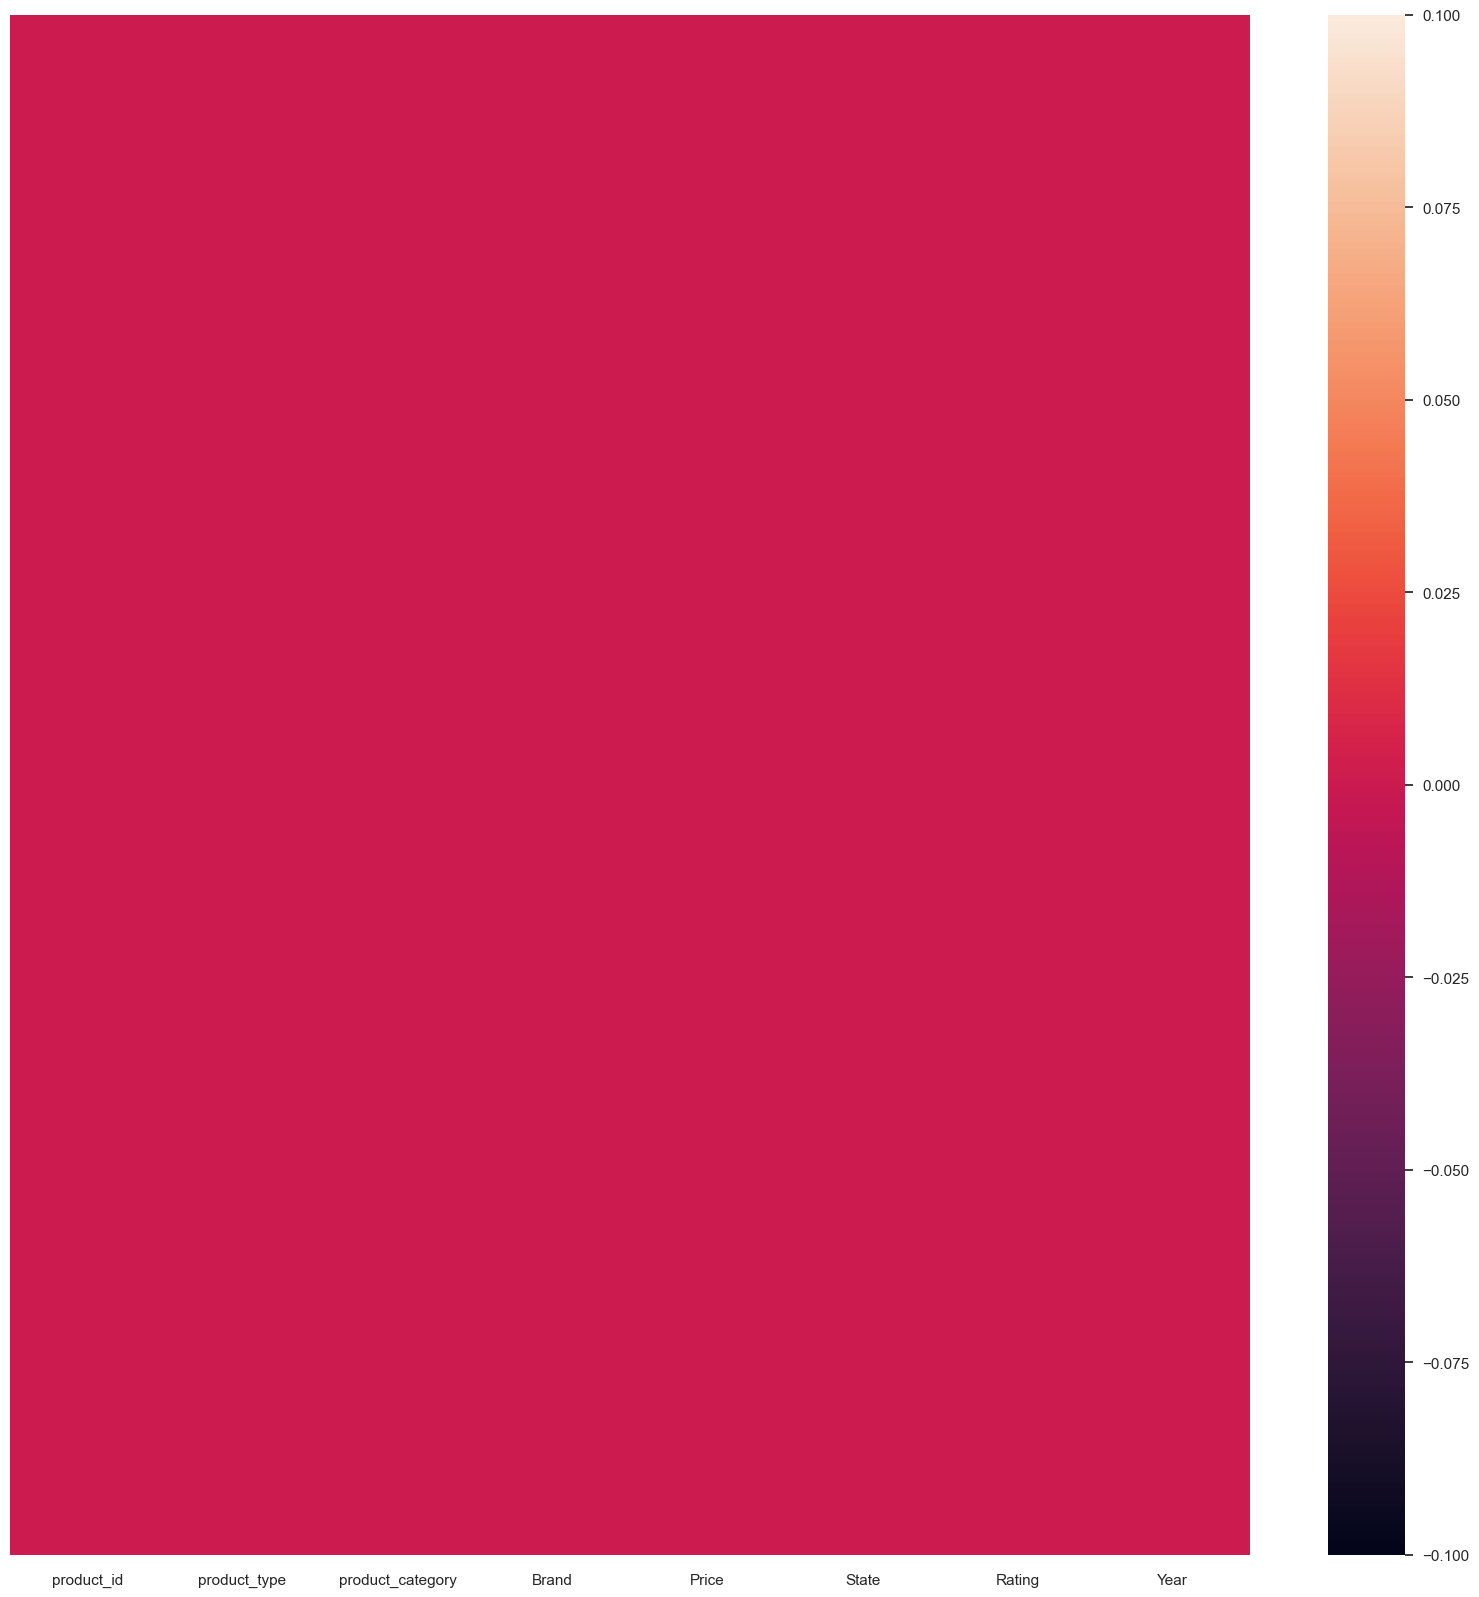

In [88]:
# PLOTTING HEATMAP TO VISUALIZE THE NUMBER OF NaN'S(NULL VALUES) IN TH DATA

plt.figure(figsize=(20,20))
sns.heatmap(tea_df.isnull(), yticklabels = False)
plt.show()

In [18]:
# HERE WE OBSERVE, WE HAVE NO NULL POINTS IN OUR DATASET
tea_df['product_type'] = tea_df['product_type'].apply(lambda x:1 if x == 'flagged' else 0)
tea_df

,ï»¿product_id,product_type,product_category,Brand,Price,State,Rating,Year
0,32,0,Coffee,KOI The,70,Maharashtra,5.2,2016
1,57,0,Tea,Mister Donut,35,Uttar Pradesh,4.5,2023
2,59,0,Drinking Chocolate,Nobicha,24,Gujrat,3.6,2016
3,22,0,Coffee,Brown CafÃ© & Eatery,65,Rajasthan,8.9,2018
4,77,0,Bakery,ATM,85,Madhya Pradesh,4.4,2000
...,...,...,...,...,...,...,...,...
75,2,0,Coffee beans,CoCo Fresh Tea & Juice,23,Andman and Nicobar,6.0,2018
76,81,0,Branded,The ALLEY,75,Dadra and Nagar Haveli,3.6,2000
77,14,0,Loose Tea,KOI The,29,daman and Diu,2.0,2022
78,8,0,Coffee beans,Mister Donut,35,Puducherry,9.0,2017


In [29]:
#STEP 4: PERFORMING DATA CLEANING

# REMOVING PUNCTUATIONS FROM OUR TEXT
import re

# Define the function to remove punctuation
def remove_punc(x):
    return re.sub('[!#?,.:";"]', "", x)

# Apply the 'remove_punc' function to the 'product_type' column
tea_df['product_type'] = tea_df['product_type'].apply(remove_punc)
tea_df['product_category'] = tea_df['product_category'].apply(remove_punc)
tea_df['State'] = tea_df['State'].apply(remove_punc)
tea_df['Brand'] = tea_df['Brand'].apply(remove_punc)


In [32]:
# PREMOVING UNNECESSARY WORDS FROM DATASET

tea_df['product_type'] = tea_df['product_type'].apply(lambda x: x .replace('\r', ''))


In [33]:
tea_df

,product_id,product_type,product_category,Brand,Price,State,Rating,Year
0,32,Gourmet brewed coffee,Coffee,KOI The,70,Maharashtra,5.2,2016
1,57,Brewed Chai tea,Tea,Mister Donut,35,Uttar Pradesh,4.5,2023
2,59,Hot chocolate,Drinking Chocolate,Nobicha,24,Gujrat,3.6,2016
3,22,Drip coffee,Coffee,Brown Café & Eatery,65,Rajasthan,8.9,2018
4,77,Scone,Bakery,ATM,85,Madhya Pradesh,4.4,2000
...,...,...,...,...,...,...,...,...
75,2,House blend Beans,Coffee beans,CoCo Fresh Tea & Juice,23,Andman and Nicobar,6.0,2018
76,81,Clothing,Branded,The ALLEY,75,Dadra and Nagar Haveli,3.6,2000
77,14,Black tea,Loose Tea,KOI The,29,daman and Diu,2.0,2022
78,8,Premium Beans,Coffee beans,Mister Donut,35,Puducherry,9.0,2017


In [35]:
# Define the preprocess function
def preprocess(x):
    # Add your preprocessing steps here
    # For example, you can lowercase the text
    return x.lower()

# Apply the preprocess function to the 'product_type' column
tea_df['cleaned'] = tea_df['product_type'].apply(preprocess)


In [36]:
tea_df['cleaned'][0]

'gourmet brewed coffee'

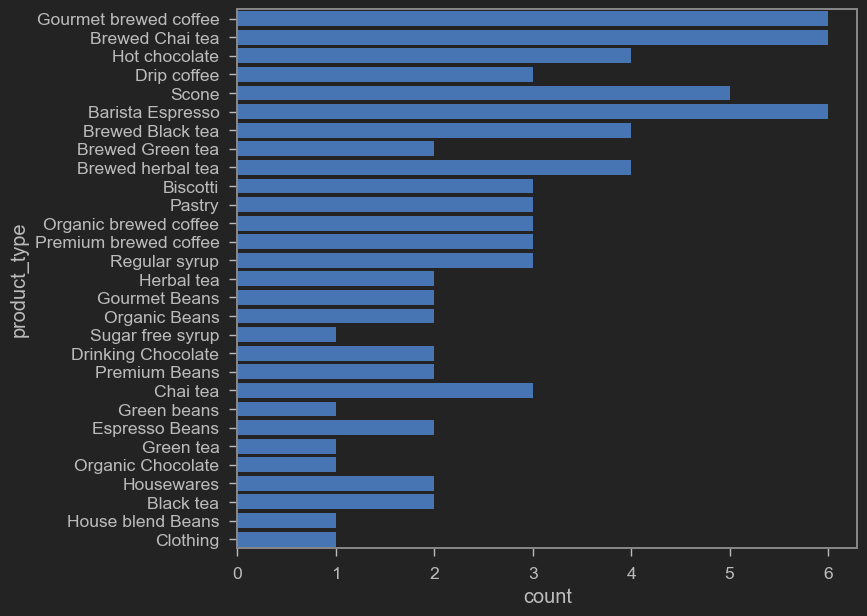

In [37]:
#STEP 5: VISUALIZING CLEANED DATASETS

# PLOTTING COUNTS OF SAMPLE LABELLED AS 1 AND 0
sns.countplot(tea_df['product_type'], label = 'Count Plot')
plt.show()


C:\Users\ipal2\AppData\Local\Temp\ipykernel_19100\2859698587.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_data['ratings'])


<Axes: xlabel='ratings', ylabel='Density'>

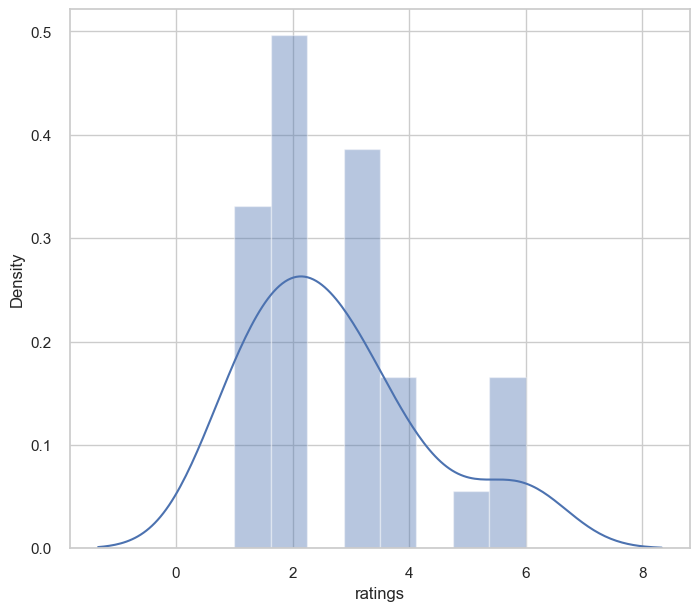

In [97]:
#Visualizing the Ratings in Our Data Set
ratings_data = pd.DataFrame(tea_df.groupby('product_type')['Rating'].mean())
ratings_data['ratings'] = tea_df.groupby('product_type')['Rating'].count()

#visualize the distribution of number of ratings by product
sns.distplot(ratings_data['ratings'])

C:\Users\ipal2\AppData\Local\Temp\ipykernel_19100\4225373813.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_data['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

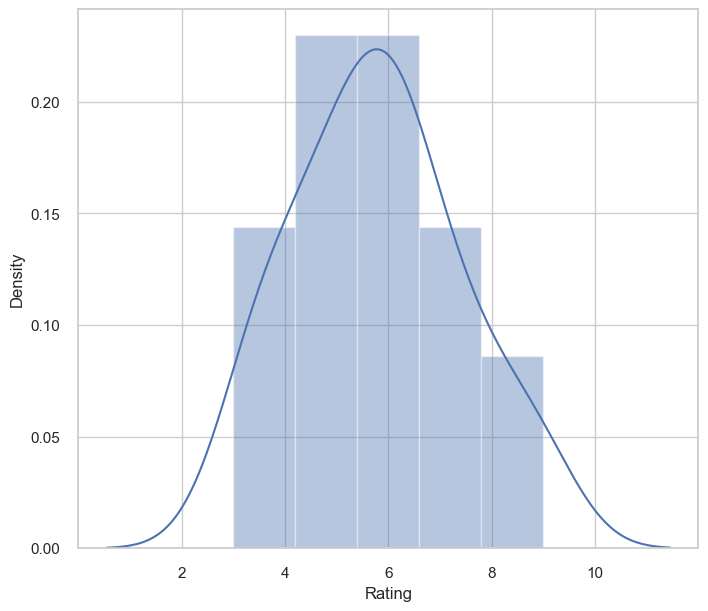

In [95]:
#create a similar visualization for the actual rating assign to the product
sns.distplot(ratings_data['Rating'])

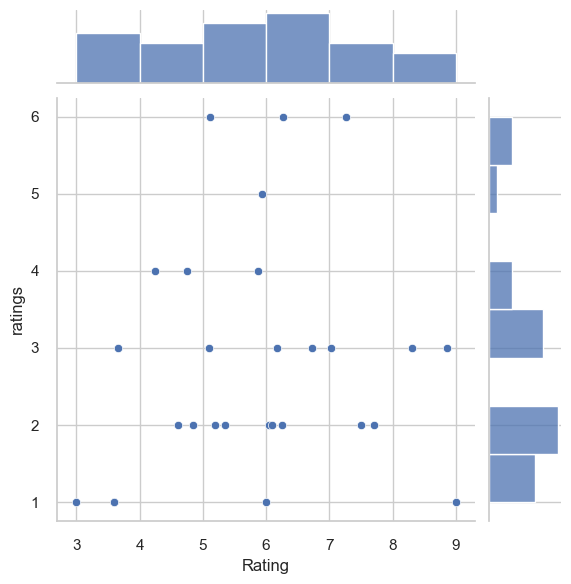

In [98]:
#The Relationship Between Average Rating and Number of ratings


sns.jointplot(x = ratings_data['Rating'], y = ratings_data['ratings'])

In [99]:
# FINDING THE MAXIMUM LENGTH IN THE tea  DATAFRAME

maxlen_tea = 0
for doc in tea_df.product_type:
    tokens = nltk.word_tokenize(doc)
    if maxlen_tea < len(tokens):
        maxlen_tea = len(tokens)
maxlen_tea

3

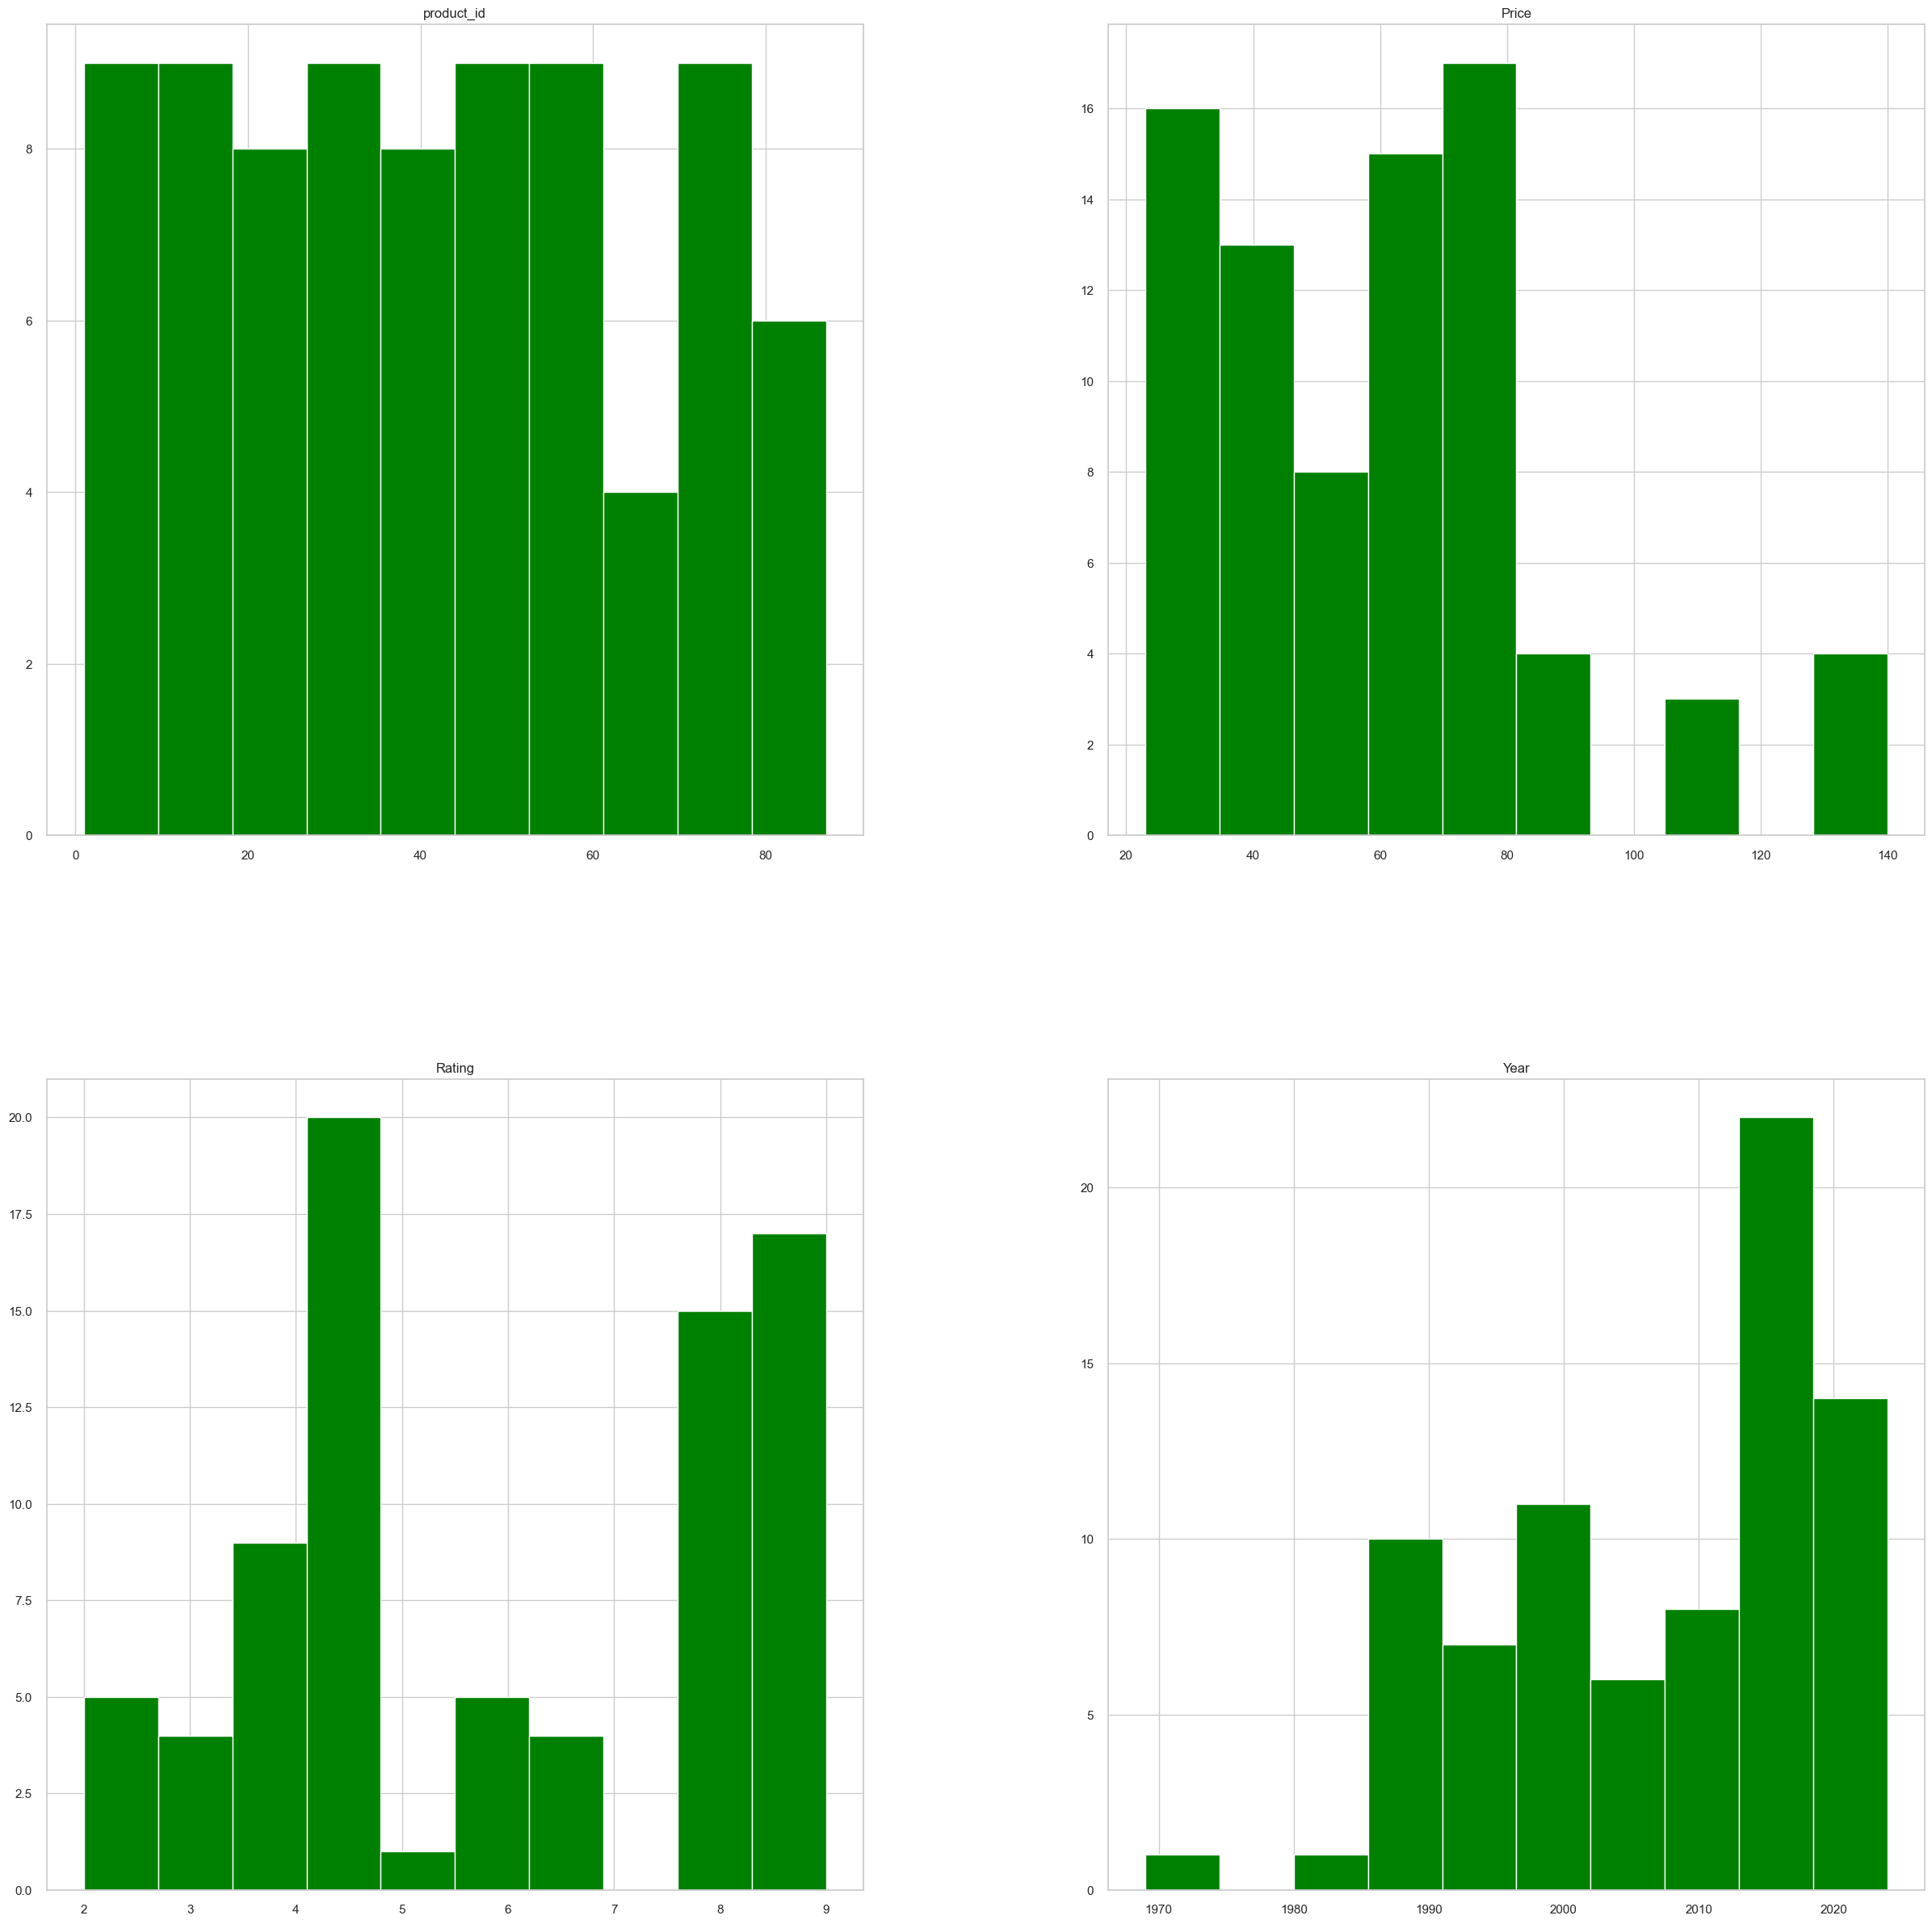

In [100]:
# VISUALIZING THE WHOLE DATAFRAME BY PLOTTING HISTOGRAM
tea_df.hist(bins = 10, figsize = (30,30), color='green')
plt.show()

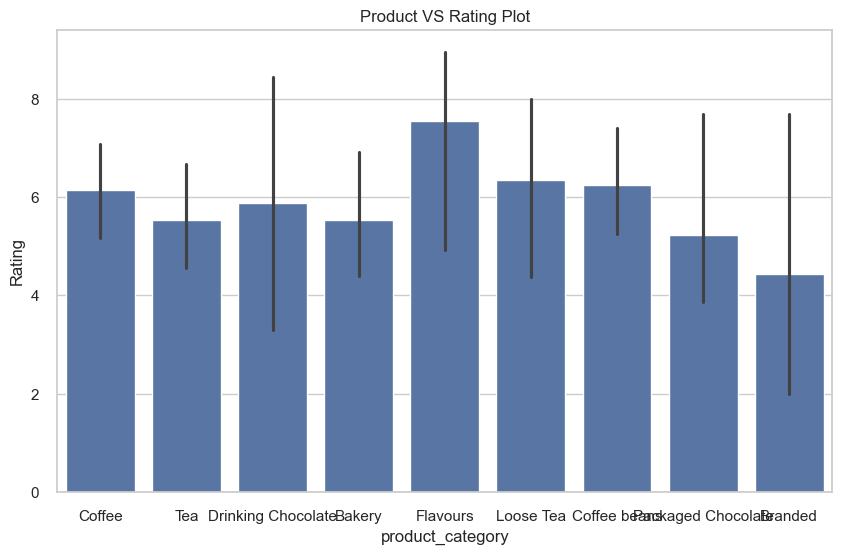

In [55]:
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the figure

sns.barplot(x='product_category', y='Rating', data=tea_df) 
plt.title("Product VS Rating Plot") 
plt.show()


C:\Users\ipal2\AppData\Local\Temp\ipykernel_19100\1694215849.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='product_category', data=tea_df, palette="deep")


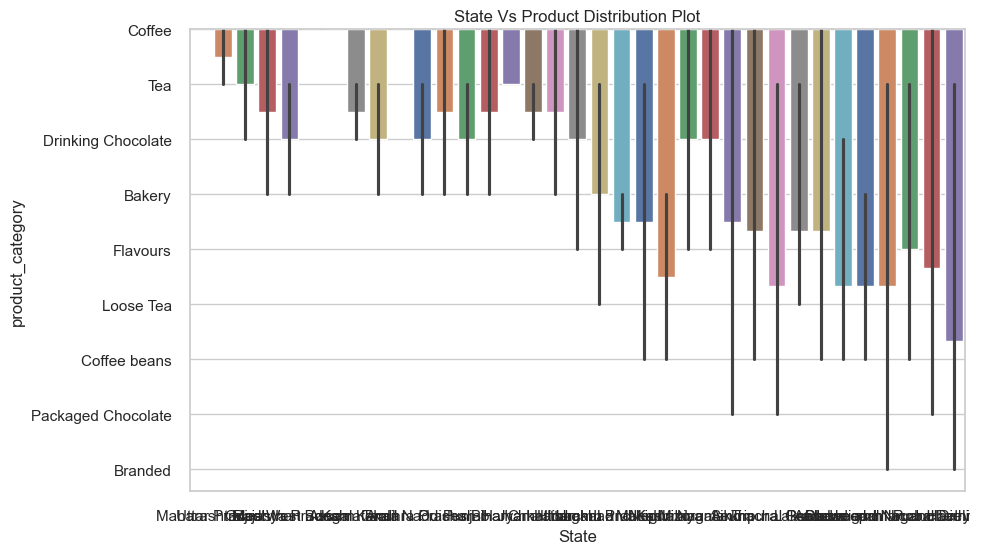

In [56]:
# State vs  Purchase distribution  
  # Assuming 'data' contains the DataFrame with purchase data
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Create the bar plot
sns.barplot(x='State', y='product_category', data=tea_df, palette="deep") 

# Set the title of the plot
plt.title("State Vs Product Distribution Plot") 

# Show the plot
plt.show()

C:\Users\ipal2\AppData\Local\Temp\ipykernel_19100\2301940971.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=t_df, palette='Set1', ax=axes[0])


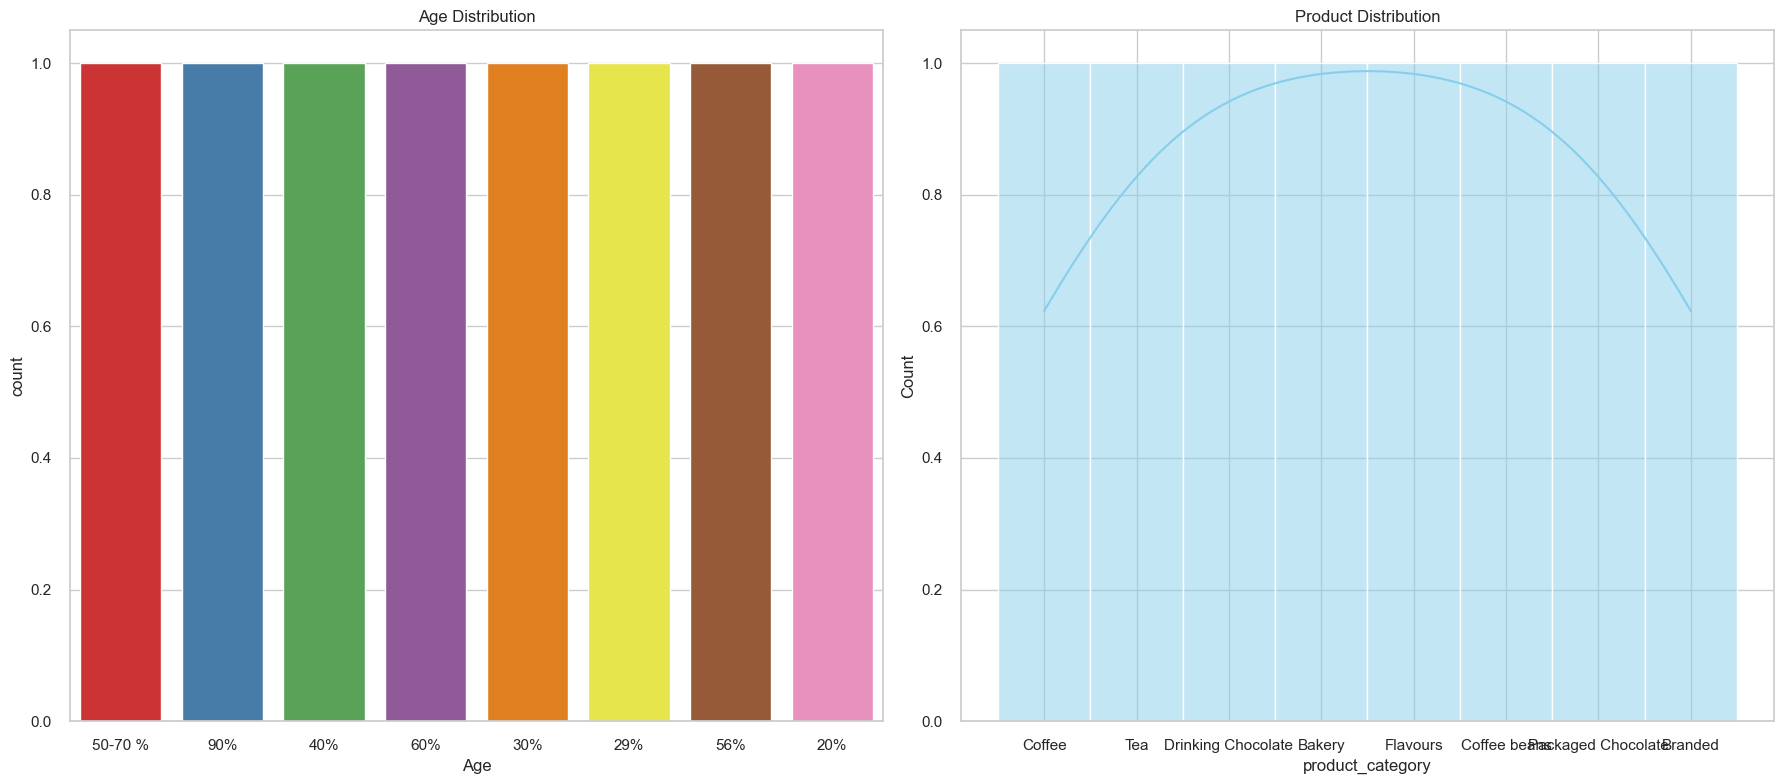

In [57]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8)) 

# Age distribution (count plot of Age column) 
sns.countplot(x='Age', data=t_df, palette='Set1', ax=axes[0]) 
axes[0].set_title('Age Distribution') 

# Purchase distribution (histplot of product_category column) 
sns.histplot(x='product_category', data=t_df, kde=True, color='skyblue', ax=axes[1]) 
axes[1].set_title('Product Distribution') 

plt.tight_layout() 
plt.show()


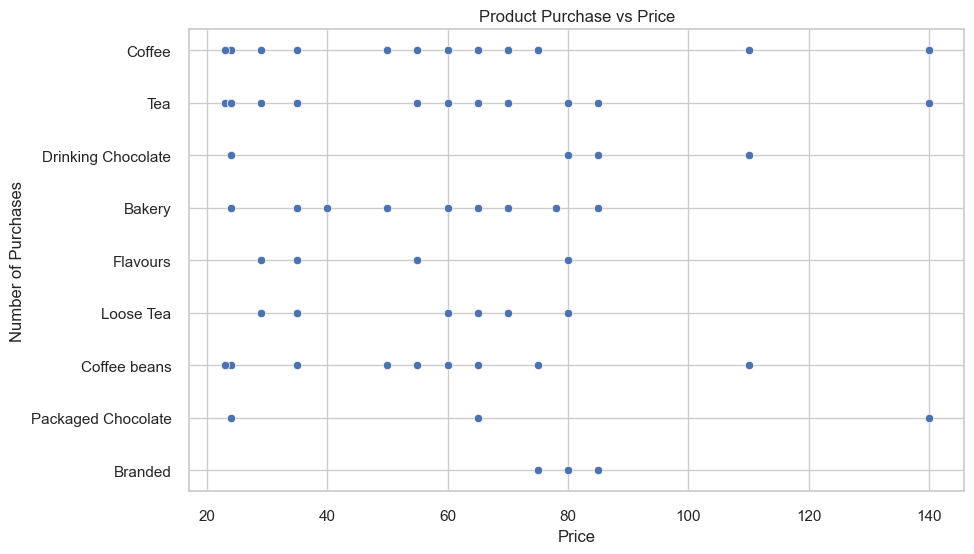

In [58]:
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Create the scatter plot
sns.scatterplot(x='Price', y='product_category', data=tea_df)

# Set the title and labels of the plot
plt.title("Product Purchase vs Price")
plt.xlabel("Price")
plt.ylabel("Number of Purchases")

# Show the plot
plt.show()

C:\Users\ipal2\AppData\Local\Temp\ipykernel_19100\2638931815.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=tea_df, palette='viridis')


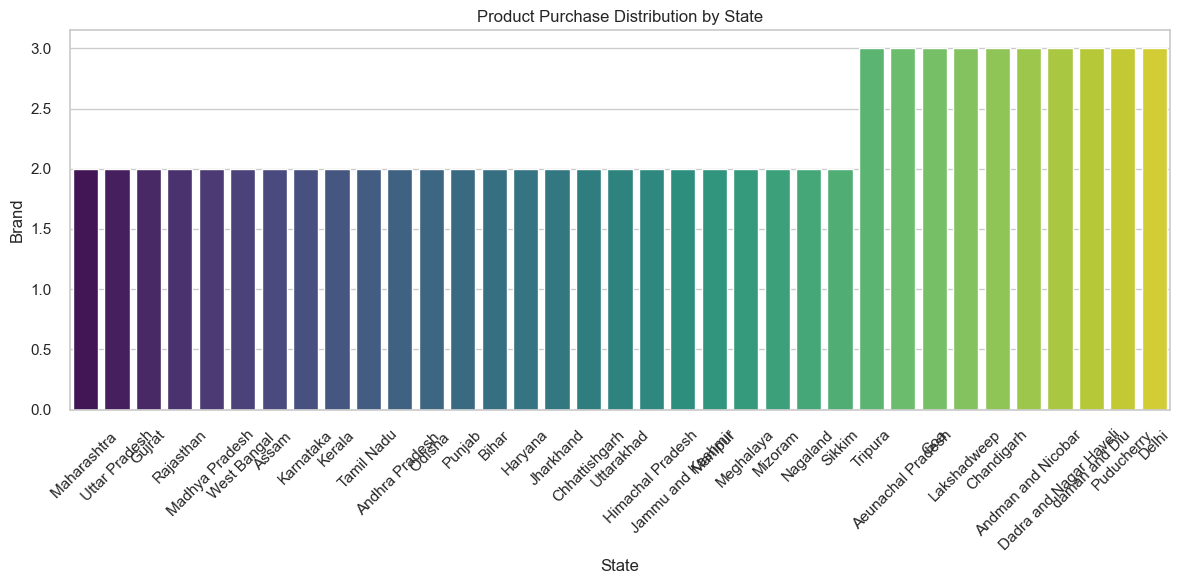

In [60]:
# Assuming 'data' contains the DataFrame with purchase data
plt.figure(figsize=(12, 6))  # Set the size of the figure

# Create the bar plot
sns.countplot(x='State', data=tea_df, palette='viridis')

# Set the title and labels of the plot
plt.title("Product Purchase Distribution by State")
plt.xlabel("State")
plt.ylabel("Brand")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\ipal2\AppData\Local\Temp\ipykernel_19100\3511168877.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_rating_by_year = tea_df.groupby('Year').apply(lambda x: x.loc[x['Rating'].idxmax()])


NameError: name 'Year' is not defined

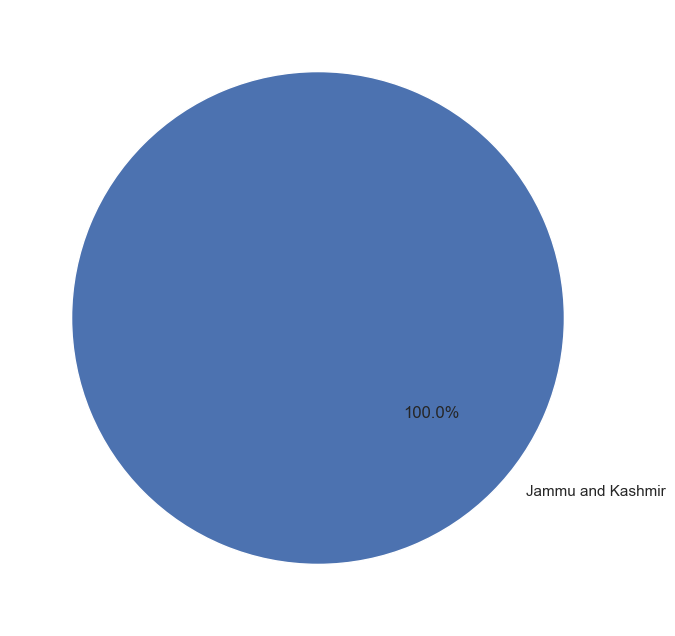

In [65]:
# Assuming 'data' contains the DataFrame with purchase data
# Assuming 'Year' and 'State' are columns in the DataFrame
# Assuming 'Rating' is the rating column in the DataFrame

# Group the data by year and find the state with the highest rating for each year
# Group the data by year and find the state with the highest rating for each year
highest_rating_by_year = tea_df.groupby('Year').apply(lambda x: x.loc[x['Rating'].idxmax()])

# Reset the index to ensure 'Year' becomes a regular column
highest_rating_by_year.reset_index(drop=True, inplace=True)

# Create a pie chart for each year
for year, group in highest_rating_by_year.groupby('Year'):
    plt.figure(figsize=(8, 8))  # Set the size of the figure
    plt.pie(group['Rating'], labels=group['State'], autopct='%1.1f%%', startangle=140)
    plt.title(f"Highest Rated State for Year {Year}")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

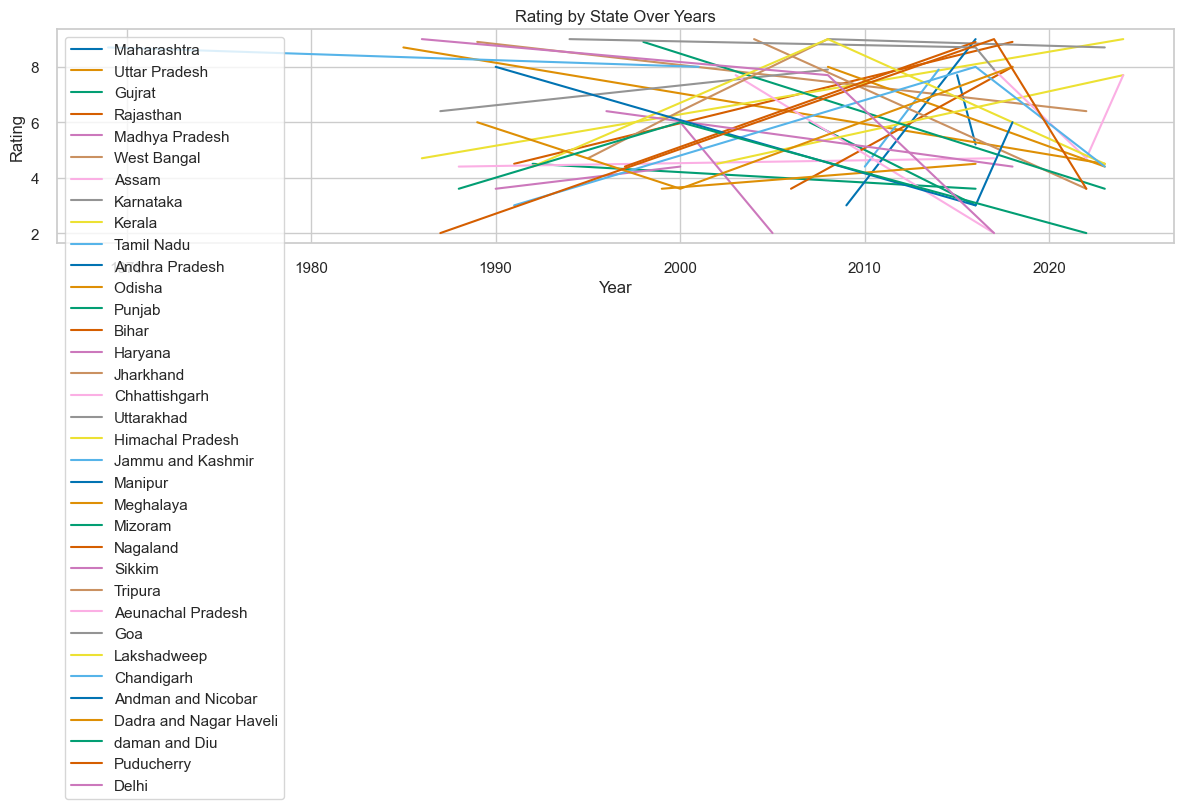

In [66]:
plt.figure(figsize=(12, 6))  # Set the size of the figure

# Create the line plot
sns.lineplot(x='Year', y='Rating', hue='State', data=tea_df, palette='colorblind')

# Set the title and labels of the plot
plt.title("Rating by State Over Years")
plt.xlabel("Year")
plt.ylabel("Rating")

# Show the plot
plt.tight_layout()
plt.legend(loc='upper left')  # Add a legend
plt.show()

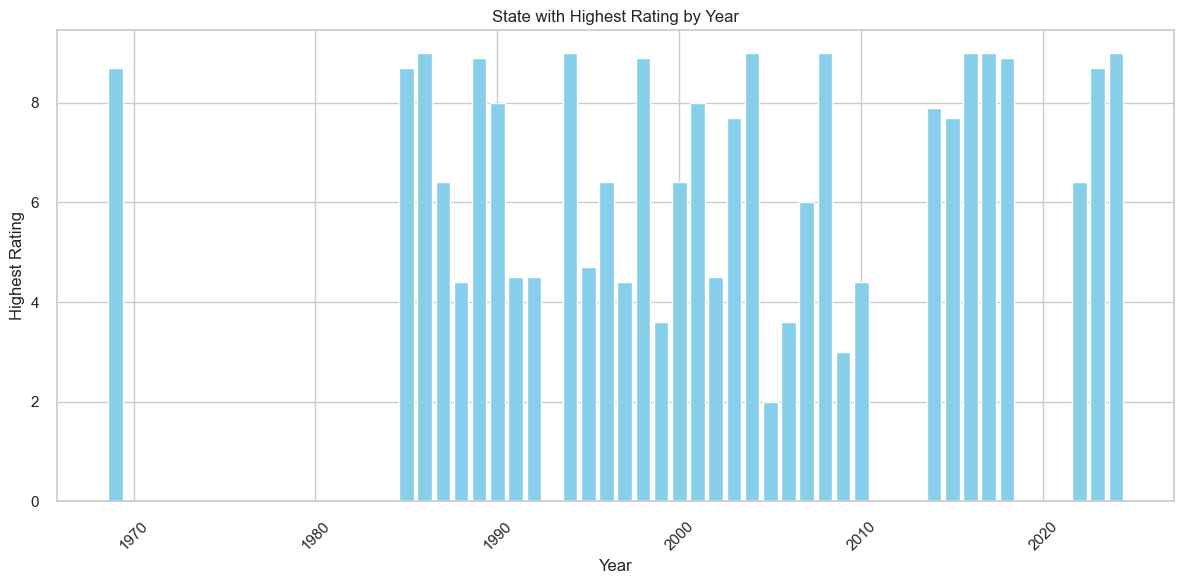

In [68]:
highest_rating_by_year = tea_df.groupby('Year')['Rating'].idxmax()  # Get the index of the row with the highest rating for each year
states_with_highest_rating = tea_df.loc[highest_rating_by_year, ['Year', 'State', 'Rating']]  # Get the corresponding state and rating

# Create the bar plot
plt.figure(figsize=(12, 6))  # Set the size of the figure
plt.bar(states_with_highest_rating['Year'], states_with_highest_rating['Rating'], color='skyblue')

# Set the title and labels of the plot
plt.title("State with Highest Rating by Year")
plt.xlabel("Year")
plt.ylabel("Highest Rating")

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Price
23     5.300000
24     5.062500
29     4.025000
35     6.166667
40     3.600000
50     6.175000
55     7.525000
60     6.633333
65     6.555556
70     5.600000
75     6.200000
78     4.700000
80     7.380000
85     3.850000
110    8.100000
140    5.100000
Name: Rating, dtype: float64


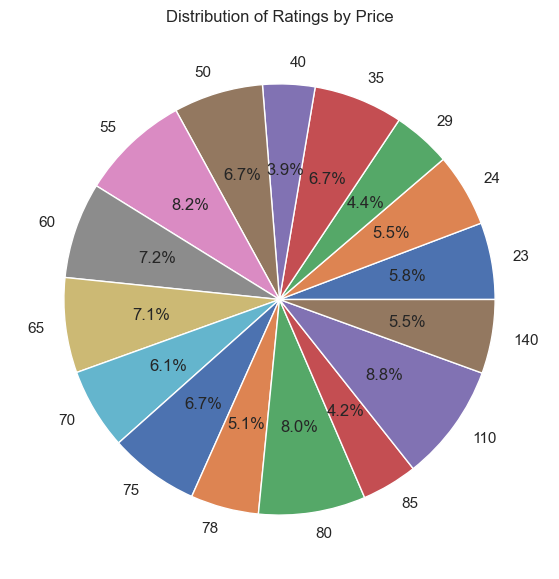

In [69]:
#comparison of purchases between cities  
tea_df = pd.read_csv('Tokyo_tea.csv')
product_category=tea_df.groupby('Price')['Rating'].mean() 
print(product_category) 
  
plt.pie(product_category.values, labels=product_category.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings by Price')
plt.show()



In [76]:
# STEP 6:PREPARING THE DATA 


#BY APPLYING COUNT VECTORIZATION
# CONVERTING SENTENCES INTO TOKENIZED FORMS AND THEN CONVERTING TO NUMERICAL VALUES IN ORDER FOR THE MODEL TO TRAIN:

from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'tea_df' contains the DataFrame with tea product data
vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(tea_df['product_type'])

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

print(feature_names)


['barista' 'beans' 'biscotti' 'black' 'blend' 'brewed' 'chai' 'chocolate'
 'clothing' 'coffee' 'drinking' 'drip' 'espresso' 'free' 'gourmet' 'green'
 'herbal' 'hot' 'house' 'housewares' 'organic' 'pastry' 'premium'
 'regular' 'scone' 'sugar' 'syrup' 'tea']


In [78]:
# PROCESSED DATA:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [103]:
#STEP 9: BUILDING TOKYO TEA RECOMMENDATION SYSTEM

#to apply cosine similarity on the vector 
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(countvectorizer)
print(similarities)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

[[1.         0.33333333 0.         ... 0.         0.         0.        ]
 [0.33333333 1.         0.         ... 0.40824829 0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.40824829 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [3]:
#analyzing the similarities between different product
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
tea_df=pd.read_csv('Tokyo_tea.csv',encoding = 'latin-1')

countvectorizer = vectorizer.fit_transform(tea_df['product_type'])


similarities = cosine_similarity(countvectorizer)


tea_df = pd.DataFrame(similarities, columns=tea_df['product_type'], index=tea_df['product_category']).reset_index()

tea_df.head()

product_type,product_category,Gourmet brewed coffee,Brewed Chai tea,Hot chocolate,Drip coffee,Scone,Gourmet brewed coffee,Barista Espresso,Hot chocolate,Brewed Chai tea,...,Chai tea,Drinking Chocolate,Black tea,Herbal tea,Gourmet Beans,House blend Beans,Clothing,Black tea,Premium Beans,Housewares
0,Coffee,1.000000,0.333333,0.0,0.408248,0.0,1.000000,0.0,0.0,0.333333,...,0.000000,0.0,0.000000,0.000000,0.408248,0.0,0.0,0.000000,0.0,0.0
1,Tea,0.333333,1.000000,0.0,0.000000,0.0,0.333333,0.0,0.0,1.000000,...,0.816497,0.0,0.408248,0.408248,0.000000,0.0,0.0,0.408248,0.0,0.0
2,Drinking Chocolate,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.0,1.0,0.000000,...,0.000000,0.5,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
3,Coffee,0.408248,0.000000,0.0,1.000000,0.0,0.408248,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
4,Bakery,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0


In [1]:
#user input

tea_name = input("Please enter your fevourite the name of the tea or coffee: ")


Please enter your fevourite the name of the tea or coffee:  chocolate


In [32]:
import difflib
import pandas as pd

# Load the DataFrame from a CSV file
tea_name = pd.read_csv(r'D:\internship\TokyoTea\Tokyo_tea.csv')

# Assuming tea_names is a list of tea names
tea_names = tea_name['product_type'].tolist()

# Define close_match initially as an empty string
close_match = "chocolate"

# Now you can perform the operation to find close matches
find_close_match = difflib.get_close_matches(close_match, tea_names)
print(find_close_match)

if find_close_match:
    close_match = find_close_match[0]
    print(close_match)
    filter_tea = tea_name[tea_name['product_type'] == close_match]
    index_of_tea = filter_tea.index[0]
    print(index_of_tea)
else:
    print("No close matches found.")


['Hot chocolate', 'Hot chocolate', 'Hot chocolate']
Hot chocolate
2


In [4]:
#CONTENT based Recommender


import pandas as pd

tea_df = pd.read_csv('Tokyo_tea.csv', encoding='latin-1')
print(tea_df.head())
print(tea_df.columns)



   ï»¿product_id           product_type    product_category  \
0             32  Gourmet brewed coffee              Coffee   
1             57        Brewed Chai tea                 Tea   
2             59          Hot chocolate  Drinking Chocolate   
3             22            Drip coffee              Coffee   
4             77                  Scone              Bakery   

                  Brand  Price           State  Rating  Year  
0               KOI The     70    Maharashtra      5.2  2016  
1          Mister Donut     35   Uttar Pradesh     4.5  2023  
2               Nobicha     24          Gujrat     3.6  2016  
3  Brown CafÃ© & Eatery     65       Rajasthan     8.9  2018  
4                   ATM     85  Madhya Pradesh     4.4  2000  
Index(['ï»¿product_id', 'product_type', 'product_category', 'Brand', 'Price',
       'State', 'Rating', 'Year'],
      dtype='object')


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF matrix from the tea descriptions
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(tea_df['product_type'])

from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(X, X)

# Function to get the top n recommendations for a given tea
def get_recommendations(product_category, cosine_sim=cosine_sim, topn=10):
    # Get the index of the tea that matches the title
    idx = tea_df[tea_df['product_type'] == product_category].index[0]

    # Get the pairwsie similarity scores of all teas with that tea
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the teas based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar teas
    sim_scores = sim_scores[1:topn+1]

    # Get the tea indices
    tea_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar teas
    return tea_df.iloc[tea_indices]

# Get the top 10 recommendations for the tea 'Matcha Green Tea'
recommended_teas = get_recommendations('Drip coffee')
print(recommended_teas)

    ï»¿product_id           product_type product_category  \
28             24            Drip coffee           Coffee   
33             23            Drip coffee           Coffee   
0              32  Gourmet brewed coffee           Coffee   
5              28  Gourmet brewed coffee           Coffee   
9              33  Gourmet brewed coffee           Coffee   
25             29  Gourmet brewed coffee           Coffee   
48             31  Gourmet brewed coffee           Coffee   
51             30  Gourmet brewed coffee           Coffee   
23             26  Organic brewed coffee           Coffee   
24             27  Organic brewed coffee           Coffee   

                          Brand  Price          State  Rating  Year  
28        MOMA'S Bubble Tea bar     65    Lakshadweep     4.4  1992  
33                      Nuu tea     35     Puducherry     2.0  1987  
0                       KOI The     70   Maharashtra      5.2  2016  
5                        TEA 65     70   West Ba

In [9]:
#collaborative filtering recommendation system
import pandas as pd

tea_df = pd.read_csv('Tokyo_tea.csv', encoding='latin-1')
print(tea_df.head())
print(tea_df.columns)
# Create a user-item matrix
user_item_matrix = tea_df.pivot_table(index='product_id', columns='Price', values='Rating')

from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
user_similarity_matrix = user_item_matrix.T.corr(method='pearson')

# Function to get the top n recommendations for a given user
def get_recommendations(product_id, user_similarity_matrix=user_similarity_matrix, topn=10):
    # Get the user's preferences
    user_preferences = user_item_matrix.loc[product_id]

    # Compute the weighted average of the user's preferences
    weighted_avg = user_similarity_matrix[product_id].dot(user_item_matrix) / user_similarity_matrix[product_id].sum()

    # Sort the teas based on the weighted average
    recommendations = weighted_avg.sort_values(ascending=False)

    # Return the top n recommendations
    return recommendations.head(topn)

# Get the top 5 recommendations for user_id 'user123'
recommended_teas = get_recommendations('57', topn=5)
print(recommended_teas)

   ï»¿product_id           product_type    product_category  \
0             32  Gourmet brewed coffee              Coffee   
1             57        Brewed Chai tea                 Tea   
2             59          Hot chocolate  Drinking Chocolate   
3             22            Drip coffee              Coffee   
4             77                  Scone              Bakery   

                  Brand  Price           State  Rating  Year  
0               KOI The     70    Maharashtra      5.2  2016  
1          Mister Donut     35   Uttar Pradesh     4.5  2023  
2               Nobicha     24          Gujrat     3.6  2016  
3  Brown CafÃ© & Eatery     65       Rajasthan     8.9  2018  
4                   ATM     85  Madhya Pradesh     4.4  2000  
Index(['ï»¿product_id', 'product_type', 'product_category', 'Brand', 'Price',
       'State', 'Rating', 'Year'],
      dtype='object')


KeyError: 'product_id'